In [1]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from heisenberg_hqa import run_heisenberg_hqa_from_datafile, datafile_to_dataframe, test_hqa
import seaborn as sns

/home/maiyuren/anaconda3/envs/quantum_computing/lib/python3.7/site-packages/qiskit/validation/fields/custom.py:76: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numpy.integer, numpy.float,


Taking 5 qubits
No such device.
Availability of gpu: False


### Load Data

In [2]:
# Loading data
data = datafile_to_dataframe("state_files/data_n_qubits-6.pkl")
data
distributions = np.array(data.statevector.to_list())
characteristics = np.array([[j]+ i for i, j in zip(data.Jlist.tolist(), data.depth.tolist())])

## Train model

In [2]:
model = run_heisenberg_hqa_from_datafile("data.pkl")

Training started:
-----iteration 0--model:HQA(
  (c_decoder_layer1): Linear(in_features=7, out_features=14, bias=True)
  (c_decoder_layer_out): Linear(in_features=14, out_features=7, bias=True)
  (c_layer1): Linear(in_features=7, out_features=120, bias=True)
  (c_layer2): Linear(in_features=120, out_features=75, bias=True)
  (c_out): Linear(in_features=75, out_features=25, bias=True)
)------
Loss tensor(1.9761, dtype=torch.float64, grad_fn=<AddBackward0>)
-----iteration 1--model:HQA(
  (c_decoder_layer1): Linear(in_features=7, out_features=14, bias=True)
  (c_decoder_layer_out): Linear(in_features=14, out_features=7, bias=True)
  (c_layer1): Linear(in_features=7, out_features=120, bias=True)
  (c_layer2): Linear(in_features=120, out_features=75, bias=True)
  (c_out): Linear(in_features=75, out_features=25, bias=True)
)------
Loss tensor(1.8250, dtype=torch.float64, grad_fn=<AddBackward0>)
-----iteration 2--model:HQA(
  (c_decoder_layer1): Linear(in_features=7, out_features=14, bias=Tru

KeyboardInterrupt: 

## Load model

In [3]:
filename = "pickled_models/hqa_model_ver_0.pickle"
with open(filename, "rb") as f:
    model = pickle.load(f)
model.reset_q_circs()

# Analysis

In [4]:
# Testing the HQA
test_results = test_hqa(model, 50, distributions)

100%|██████████| 50/50 [00:06<00:00,  8.26it/s]

Average Loss: 0.00446564604640953


In [10]:
# Creating the vectors
model.create_latent_vectors(distributions, characteristics)
model.pca_transform_latent_vectors(3, True)
model.dataframe_latent_points('heisenberg')
model.latent_landscape(0,1)

100it [00:04, 20.43it/s]

Variance explained by each principal component:
[95.5350954211221, 3.7099834398216207, 0.6823797179354264, 0.06949806426061034, 0.0019713256834452374, 0.0009823470132447523, 1.2050133798921329e-05, 7.763402975875167e-05]



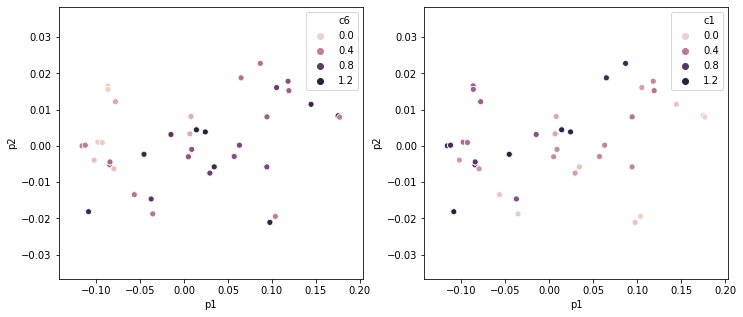

In [15]:
fig, axs = plt.subplots(1,2, figsize=(12,5))
ax = sns.scatterplot(x="p1", y="p2", hue='c6', data=model.df_latent_vectors, ax=axs[0])
ax = sns.scatterplot(x="p1", y="p2", hue='c1', data=model.df_latent_vectors, ax=axs[1])

In [36]:
model.df_latent_vectors

,depth,ham_indx,latent_vector,p1,p2
0,1.0,0.52961,"[-1.9222362, 0.01785163, -0.0006903503]",-1.922236,0.017852
1,2.0,0.52961,"[-1.9054637, 0.01621604, -0.00043154572]",-1.905464,0.016216
2,3.0,0.52961,"[-1.9054644, 0.016216172, -0.00043173207]",-1.905464,0.016216
3,4.0,0.52961,"[-1.9054565, 0.016215526, -0.00043136193]",-1.905457,0.016216
4,5.0,0.52961,"[-1.9054573, 0.016215445, -0.0004314605]",-1.905457,0.016215
...,...,...,...,...,...
95,1.0,0.42629,"[2.043962, 0.012561013, 0.0016336389]",2.043962,0.012561
96,2.0,0.42629,"[1.8132207, 0.009912527, -0.001588899]",1.813221,0.009913
97,3.0,0.42629,"[1.8132176, 0.009912379, -0.001589098]",1.813218,0.009912
98,4.0,0.42629,"[1.8132205, 0.009912504, -0.0015888693]",1.813221,0.009913
